<a href="https://colab.research.google.com/github/Pablobarchiesi94/PI_2_Data_Analytics/blob/main/EDA/EDA_PI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis explratorio de datos (EDA)
##Proyecto de análisis de datos
## Enacom-Acceso a internet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##En este primer dataframe he analisado el incremento de la velocidad media de bajada de internet fijo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Velocidad_Media_de_bajada_Internet_fijo.csv')

In [ ]:
df.head(11)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,1,"55,11",Ene-Mar 2022
1,2021,4,"52,34",Oct-Dic 2021
2,2021,3,"48,46",Jul-Sept 2021
3,2021,2,"45,63",Abr-Jun 2021
4,2021,1,"43,11",Ene-Mar 2021
5,2020,4,"42,36",Oct-Dic 2020
6,2020,3,"40,67",Jul-Sept 2020
7,2020,2,"38,32",Abr-Jun 2020
8,2020,1,"37,52",Ene-Mar 2020
9,2019,4,"28,26",Oct-Dic 2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     33 non-null     int64 
 1   Trimestre               33 non-null     int64 
 2   Mbps (Media de bajada)  33 non-null     object
 3   Trimestre.1             33 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [ ]:
df["Año"] = df["Año"].astype("category")
df["Trimestre"] = df["Trimestre"].astype("category")
df["Mbps (Media de bajada)"] = df["Mbps (Media de bajada)"].str.replace(',','.').astype("float")



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Año                     33 non-null     category
 1   Trimestre               33 non-null     category
 2   Mbps (Media de bajada)  33 non-null     float64 
 3   Trimestre.1             33 non-null     object  
dtypes: category(2), float64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
df= df.rename(columns={"Trimestre.1":"Periodo"})

In [ ]:
df=df.iloc[::-1].reset_index(drop=True)

En el siguiente gráfico se pude observar un claro incremento de la velocidad media de bajada de internet en Argentina a partir del primer trimestre de 2020. Esto conidice con el inicio de la pandemia por covid-19 en el país

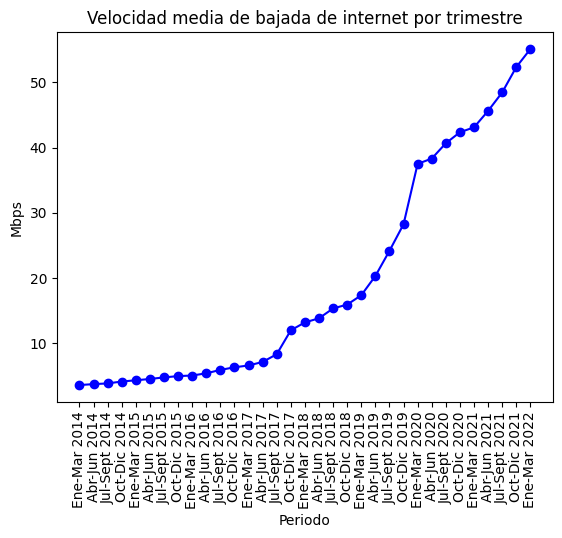

In [ ]:
plt.plot(df['Periodo'],df['Mbps (Media de bajada)'],marker='o',color='blue')
plt.xticks(df['Periodo'],rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Mbps')
plt.title('Velocidad media de bajada de internet por trimestre')
plt.show()

##Acceso a internet por banda ancha y dial up

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Total_nacional_accesos_Internet_banda_ancha_y_banda_angosta.csv')

In [ ]:
df2.head(5)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
1,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
2,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021
3,2021,2,9.852.702,10.382,9.863.084,Abr-Jun 2021
4,2021,1,9.637.956,10.016,9.647.972,Ene-Mar 2021


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Año               33 non-null     category
 1   Trimestre         33 non-null     category
 2   Banda ancha fija  33 non-null     object  
 3   Dial up           33 non-null     float64 
 4   Total             33 non-null     object  
 5   Periodo           33 non-null     object  
dtypes: category(2), float64(1), object(3)
memory usage: 1.8+ KB


In [ ]:
df2["Año"] = df2["Año"].astype("category")
df2["Trimestre"] = df2["Trimestre"].astype("category")


In [ ]:
df2["Banda ancha fija"] = df2["Banda ancha fija"].str.replace('.', '', regex=False)
df2["Banda ancha fija"] = df2["Banda ancha fija"].str.replace(',', '.', regex=False)
df2["Banda ancha fija"] = df2["Banda ancha fija"].astype("int64")


In [ ]:
df2["Dial up"] = df2["Dial up"].astype(str)
df2["Dial up"] = df2["Dial up"].str.replace('.', '', regex=False)
df2["Dial up"] = df2["Dial up"].str.replace(',', '.', regex=False)
df2["Dial up"] = df2["Dial up"].astype("int64")


In [ ]:
df2=df2.iloc[::-1].reset_index(drop=True)

En este gráfico se analizan ambas bandas y se observa una clara diferencia entre la cantidad de usuarios de banda ancha y dial up. Este ultimo mencionado no se aprecia de manera correcta en el gráfico debido a la diferencia de usuarios y el tamaño de la escala.

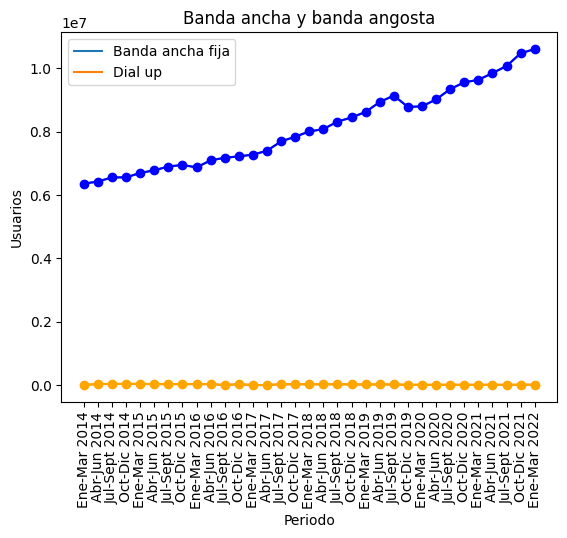

In [ ]:
# Crear el gráfico
plt.plot('Periodo', 'Banda ancha fija', data= df2, label='Banda ancha fija')
plt.plot(df2['Periodo'], df2['Dial up'], label='Dial up')


plt.plot(df2['Periodo'],df2['Dial up'],marker='o',color='orange')
plt.plot(df2['Periodo'],df2['Banda ancha fija'],marker='o',color='blue')
plt.legend()
plt.xticks(df2['Periodo'],rotation=90)
plt.xlabel('Periodo'),
plt.ylabel('Usuarios')
plt.title('Banda ancha y banda angosta')
plt.show()


In [ ]:
df2=df2.iloc[::-1].reset_index(drop=True)

In [ ]:
df2 = df2[df2['Dial up'] >= 5000]


En este gráfico se puede observar la caída de usuarios de la tecnología de Dial up de forma más clara

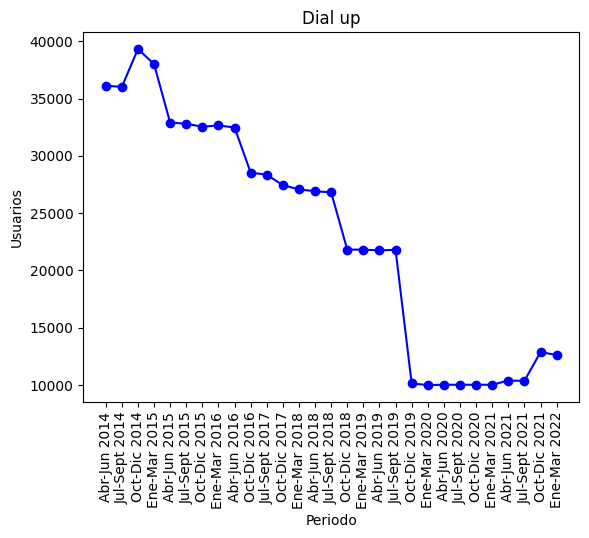

In [ ]:

# Crear el gráfico
plt.plot('Periodo', 'Dial up', data= df2, label='Dial up',marker='o',color='blue')
plt.xticks(df2['Periodo'],rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Usuarios')
plt.title('Dial up')
plt.show()

##Serie trimestral accesos Internet fijo por tecnología

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Serie_trimestral_accesos_Internet_fijo_por_tecnología.csv')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           33 non-null     int64  
 1   Trimestre     33 non-null     int64  
 2   ADSL          33 non-null     object 
 3   Cablemodem    33 non-null     object 
 4   Fibra óptica  33 non-null     object 
 5   Wireless      33 non-null     float64
 6   Otros         33 non-null     float64
 7   Total         33 non-null     object 
 8   Periodo       33 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.4+ KB


In [ ]:
df3=df3.iloc[::-1].reset_index(drop=True)

In [ ]:
df3['ADSL'] = df3['ADSL'].str.replace('.', '').astype('int64')
df3['Cablemodem'] = df3['Cablemodem'].str.replace('.', '').astype('int64')
df3['Fibra óptica'] = df3['Fibra óptica'].str.replace('.', '').astype('int64')



<ipython-input-54-6cf2e5f0385d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['ADSL'] = df3['ADSL'].str.replace('.', '').astype('int64')
<ipython-input-54-6cf2e5f0385d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Cablemodem'] = df3['Cablemodem'].str.replace('.', '').astype('int64')
<ipython-input-54-6cf2e5f0385d>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Fibra óptica'] = df3['Fibra óptica'].str.replace('.', '').astype('int64')


In [ ]:
df3['Wireless'] = df3['Wireless'].astype('int64')
df3['Otros'] = df3['Otros'].astype('int64')


El siguiente gráfico nos muestra la variación de los accesos por tecnología trimestralmente. Es notable la caída en los accesos por ADSL y el incremento de la fibra óptica y el cablemodem, sobre todo a partir del tercer trimestre de 2018.

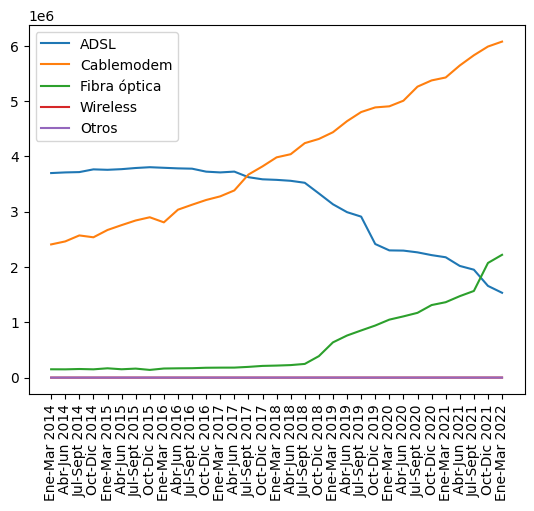

In [ ]:
plt.plot(df3['Periodo'], df3['ADSL'], label='ADSL')
plt.plot(df3['Periodo'], df3['Cablemodem'], label='Cablemodem')
plt.plot(df3['Periodo'], df3['Fibra óptica'], label='Fibra óptica')
plt.plot(df3['Periodo'], df3['Wireless'], label='Wireless')
plt.plot(df3['Periodo'], df3['Otros'], label='Otros')
plt.xticks(rotation=90)
plt.legend()
plt.show()



##Penetración por hogares nacional de internet fijo

In [ ]:
df4=pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Penetración_por_hogares_nacional_Internet fijo.csv')

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           33 non-null     int64 
 1   Trimestre                     33 non-null     int64 
 2   Accesos por cada 100 hogares  33 non-null     object
 3   Accesos por cada 100 hab      33 non-null     object
 4   Periodo                       33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


In [ ]:
df4['Accesos por cada 100 hogares'] = df4['Accesos por cada 100 hogares'].str.replace(',', '.').astype('float64')


In [ ]:
df4['Accesos por cada 100 hab'] = df4['Accesos por cada 100 hab'].str.replace(',', '.').astype('float64')


In [ ]:
df4=df4.iloc[::-1].reset_index(drop=True)

En la siguiente gráfica se observa un notable incremento de la cantidad de accesos a internet en los hogares. Sobre todo luego del primer trimestre del 2020, coincidiendo nuevamente con el comienzo de la pandemia en Argentina

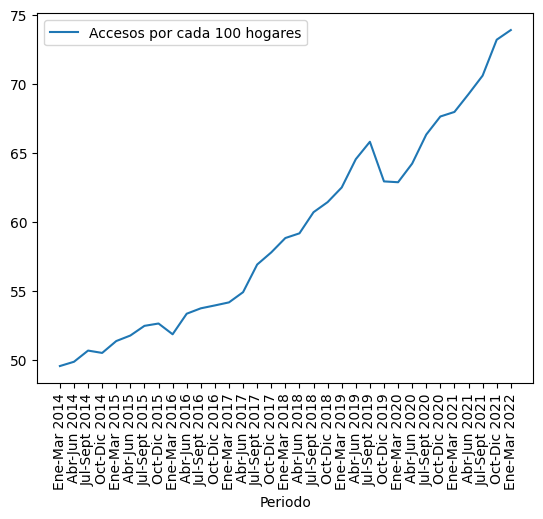

In [ ]:
plt.plot(df4['Periodo'], df4['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.legend()
plt.show()

##Penetración de Internet fijo (accesos cada 100 hogares)

In [ ]:
df5=pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Penetración_de _Internet fijo _(accesos _cada_100 hogares).csv')

In [ ]:
df5['Accesos por cada 100 hogares'] = df5['Accesos por cada 100 hogares'].str.replace(',', '.').astype('float64')

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   Accesos por cada 100 hogares  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


In [ ]:
df5.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,76.08
1,2022,1,Capital Federal,111.80
2,2022,1,Catamarca,58.21
3,2022,1,Chaco,44.06
4,2022,1,Chubut,88.05


En este dataframe podemos observar los accesos a internet por cada 100 hogares

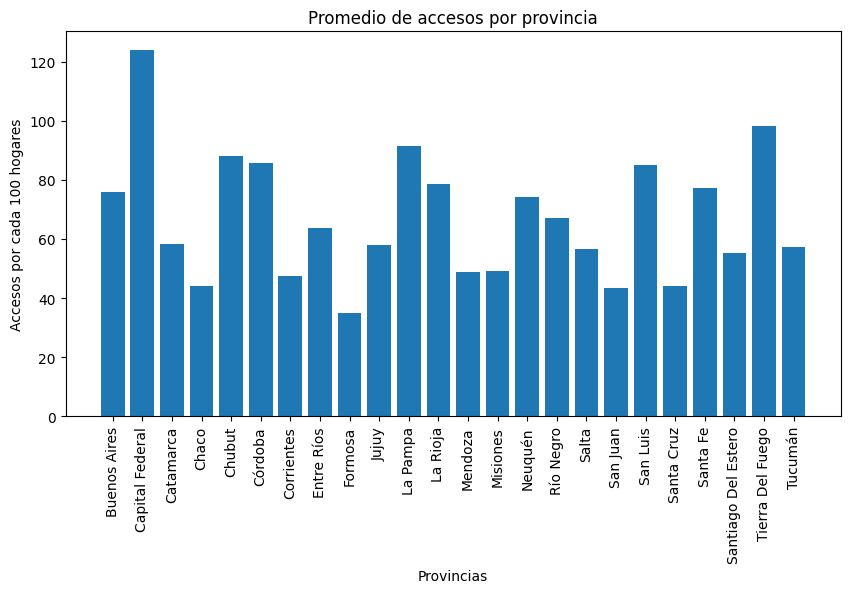

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(df5["Provincia"], df5["Accesos por cada 100 hogares"])

ax.set_xlabel("Provincias")
ax.set_ylabel("Accesos por cada 100 hogares")
ax.set_title("Promedio de accesos por provincia")
plt.xticks(rotation=90)
plt.show()

Podemos observar una media de 47,9,con esto podemos decir que casi la mitad de lo hores del país tiene acceso a internet. La desviación estandar de 22,8 nos indica que la mayoria de los datos que tenemos se encuentran entre el 25 y el 70% de accesos a internet por hogares. El valor de la mediana es cercano a la media esto indica que no hay un sesgo significativo en la distribución de los datos. El valor máximo de 124, nos indica que hay hogares con más de un acceso a internet.

In [ ]:
df5.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,792.000000,792.000000,792.000000
mean,2017.636364,2.454545,47.907184
std,2.386030,1.131306,22.810661
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,31.540000
50%,2018.000000,2.000000,44.625000
75%,2020.000000,3.000000,60.575000
max,2022.000000,4.000000,124.060000


##Ingresos trimestrales prestación servicio Internet fijo

In [ ]:
df6=pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Ingresos_trimestrales_prestación_servicio_Internet_fijo.csv')

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        33 non-null     int64 
 1   Trimestre                  33 non-null     int64 
 2   Ingresos (miles de pesos)  33 non-null     object
 3   Periodo                    33 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [ ]:
df6['Ingresos (miles de pesos)'] = df6['Ingresos (miles de pesos)'].str.replace('.', '', regex=False)
df6['Ingresos (miles de pesos)'] = df6['Ingresos (miles de pesos)'].astype('float')


In [ ]:
df6 = df6.iloc[::-1].reset_index(drop=True)

En este gráfica se observa el incremento de ingresos en pesos argentinos (ARG$) desde 2014 a hasta el primer trimestre de 2022

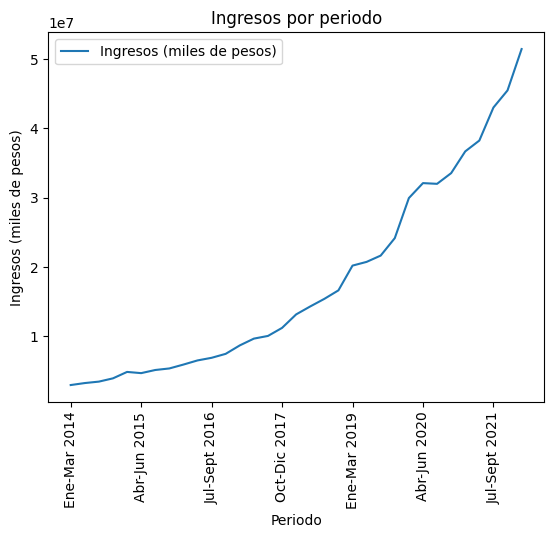

In [ ]:
df6.plot(x='Periodo', y='Ingresos (miles de pesos)')
plt.xticks(rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Ingresos por periodo')
plt.show()

##Acceso Internet Fijo por rangos velocidad bajada y provincia

In [ ]:
df7=pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.csv')

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  792 non-null    int64  
 1   Trimestre            792 non-null    int64  
 2   Provincia            792 non-null    object 
 3   HASTA 512 kbps       792 non-null    float64
 4   + 512 Kbps - 1 Mbps  792 non-null    float64
 5   + 1 Mbps - 6 Mbps    792 non-null    object 
 6   + 6 Mbps - 10 Mbps   792 non-null    float64
 7   + 10 Mbps - 20 Mbps  792 non-null    float64
 8   + 20 Mbps - 30 Mbps  792 non-null    float64
 9   + 30 Mbps            792 non-null    object 
 10  OTROS                786 non-null    float64
 11  Total                792 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 74.4+ KB


In [ ]:
df7['Trimestre'] = df7['Trimestre'].astype('category')

In [ ]:
df7['+ 1 Mbps - 6 Mbps'] = df7['+ 1 Mbps - 6 Mbps'].str.replace('.', '', regex=False).astype('float64')

In [ ]:
df7['+ 30 Mbps'] = df7['+ 30 Mbps'].str.replace('.', '', regex=False).astype('float64')
df7['Total'] = df7['Total'].str.replace('.', '', regex=False).astype('float64')

In [ ]:
numeric_columns = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                   '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']

En este gráfico de barras apiladas muestra cómo se distribuyen las diferentes velocidades de Internet a lo largo de los años. Las velocidades más predominantes son "1 a 6 Mbps" y "+30 Mbps".

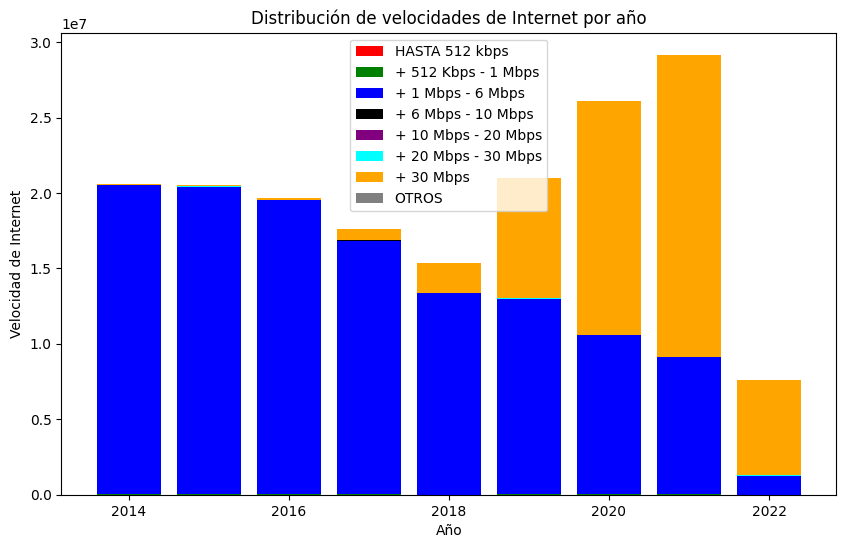

In [ ]:
numeric_columns = ['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                   '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']
colores = ['red', 'green', 'blue', 'black','purple','cyan','orange','gray']

grouped_data = df7.groupby('Año')[numeric_columns].sum()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
bottom = None

for column, color in zip(numeric_columns, colores):
    plt.bar(grouped_data.index, grouped_data[column], bottom=bottom, label=column, color=color)
    if bottom is None:
        bottom = grouped_data[column]
    else:
        bottom += grouped_data[column]

plt.xlabel('Año')
plt.ylabel('Velocidad de Internet')
plt.title('Distribución de velocidades de Internet por año')

plt.legend()
plt.show()


##Velocidad media bajada Internet fijo por provincia

In [ ]:
df9=pd.read_csv('/content/drive/MyDrive/PI 2/Internet/Velocidad_media_bajada_Internet_fijo_por_provincia.csv')

In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     792 non-null    int64 
 1   Trimestre               792 non-null    int64 
 2   Provincia               792 non-null    object
 3   Mbps (Media de bajada)  792 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.9+ KB


En este gráfico se observa el promedio de velocidad de bajada de internet por provincias. Con una notable la diferencia de Capital Federal con el resto de las provincias, superando los 80 Mbps, miestras que es Chubut, Santa Cruz, La Pampa, San Juan, Santiago del Estero y Tierra del Fuego la velocidad media no supera los 20 Mbps.

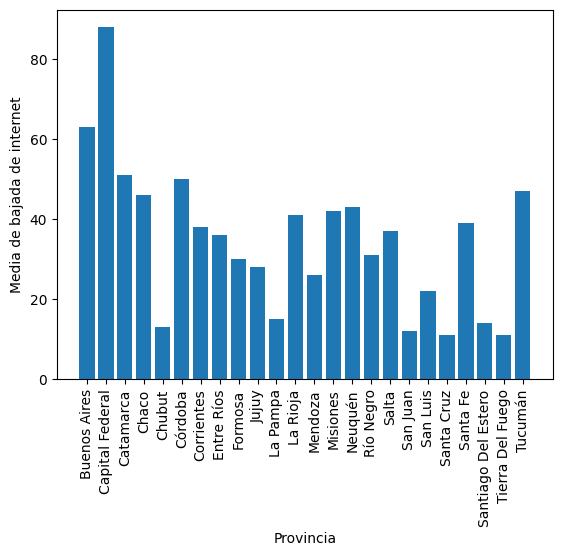

In [ ]:
plt.bar(df9['Provincia'], df9['Mbps (Media de bajada)'])
plt.xlabel('Provincia')
plt.ylabel('Media de bajada de internet')
plt.xticks(rotation=90)
plt.show()


# Enacom Telefonía fija
##Accesos telefonía fija por cada 100 hogares

In [ ]:
df10=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonia Fija/Penetración_provincial_telefonia_fija_accesos_cada_100_hogares.csv')

In [ ]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Año                                          792 non-null    int64 
 1   Trimestre                                    792 non-null    int64 
 2   Provincia                                    792 non-null    object
 3   Accesos telefonía fija por cada 100 hab      792 non-null    object
 4   Accesos telefonía fija por cada 100 hogares  792 non-null    object
dtypes: int64(2), object(3)
memory usage: 31.1+ KB


In [ ]:
df10['Accesos telefonía fija por cada 100 hogares'] = df10['Accesos telefonía fija por cada 100 hogares'].str.replace(',', '.', regex=True).astype('float64')

En este gráfica se observa claramente que el promedio de accesos a telefonia fija por daca 100 hogares es notablemente superior en Capital Federal, esto tiene una estrecha relación con la densidad poblacional del lugar. Repeitiendoce este comportameinto con el acceso de internet fijo por cada 100 hogares

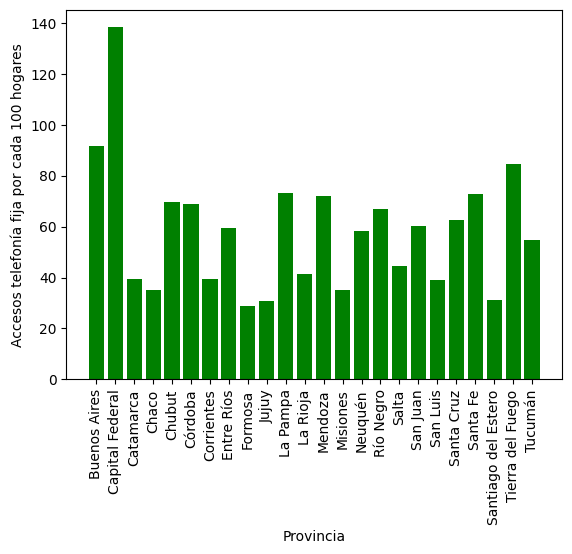

In [ ]:
plt.bar(df10['Provincia'], df10['Accesos telefonía fija por cada 100 hogares'],color='green')
plt.xlabel('Provincia')
plt.ylabel('Accesos telefonía fija por cada 100 hogares')
plt.xticks(rotation=90)
plt.show()

El siguiente gráfico muestra la diminución del uso de la telefonía fija por cada 100 hogares en Argentina. Esta caída comienza en el año 2017, cuando se observa un incremento en el uso de fibra óptica para el acceso a internet que no necesita de una linea telefónica para funcionar

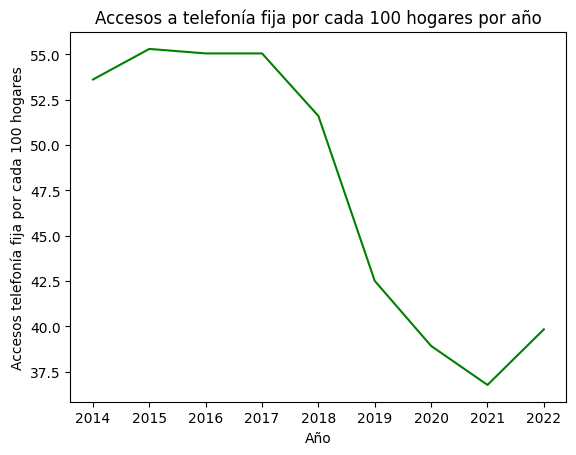

In [ ]:
accesos_por_año = df10.groupby('Año')['Accesos telefonía fija por cada 100 hogares'].mean()
plt.plot(accesos_por_año.index, accesos_por_año,color='green')

plt.xlabel('Año')
plt.ylabel('Accesos telefonía fija por cada 100 hogares')
plt.title('Accesos a telefonía fija por cada 100 hogares por año')
plt.show()

##Penetración total nacional telefonía fija por trimestre


In [ ]:
df11=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonia Fija/Penetración_total_nacional_telefonía_fija_por_trimestre.csv')

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Año                                          33 non-null     int64 
 1   Trimestre                                    33 non-null     int64 
 2   Accesos telefonía fija por cada 100 hab      33 non-null     object
 3   Accesos telefonía fija por cada 100 hogares  33 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [ ]:
df11['Año'] = df11['Año'].astype('category')
df11['Trimestre'] = df11['Trimestre'].astype('category')
df11['Accesos telefonía fija por cada 100 hogares'] = df11['Accesos telefonía fija por cada 100 hogares'].str.replace(',', '.', regex=True).astype('float64')
df11['Accesos telefonía fija por cada 100 hab'] = df11['Accesos telefonía fija por cada 100 hab'].str.replace(',', '.', regex=True).astype('float64')

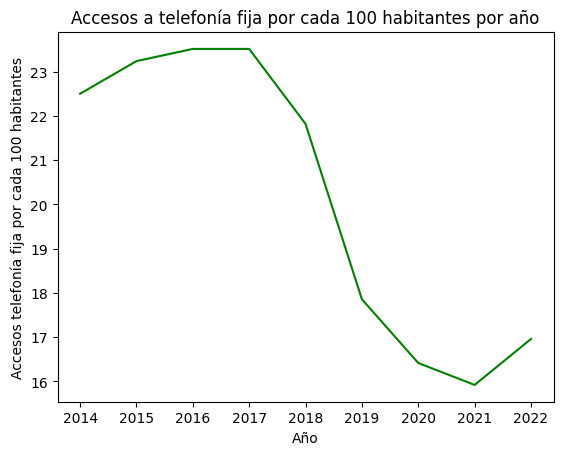

In [ ]:
accesos_por_año = df11.groupby('Año')['Accesos telefonía fija por cada 100 hab'].mean()
plt.plot(accesos_por_año.index, accesos_por_año,color='green')
plt.xlabel('Año')
plt.ylabel('Accesos telefonía fija por cada 100 habitantes')
plt.title('Accesos a telefonía fija por cada 100 habitantes por año')
plt.show()

En el gráfico muestra de igual manera que en los accesos por hogares la disminución de los accesos a la telefonía fija por habitantes.

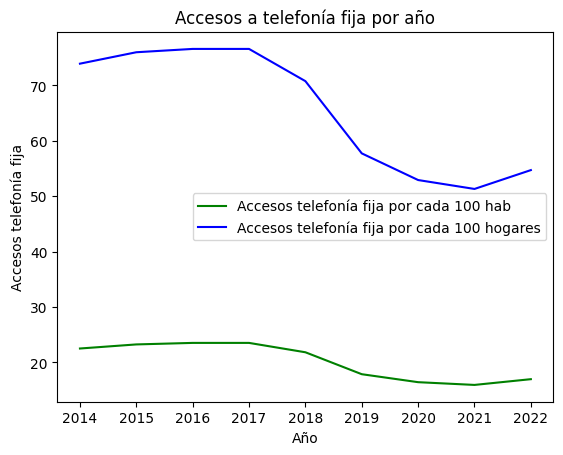

In [ ]:
accesos_por_año = df11.groupby('Año')['Accesos telefonía fija por cada 100 hab'].mean()
plt.plot(accesos_por_año.index, accesos_por_año, color='green', label='Accesos telefonía fija por cada 100 hab')

accesos_por_año_2 = df11.groupby('Año')['Accesos telefonía fija por cada 100 hogares'].mean()
plt.plot(accesos_por_año_2.index, accesos_por_año_2, color='blue', label='Accesos telefonía fija por cada 100 hogares')

plt.xlabel('Año')
plt.ylabel('Accesos telefonía fija')
plt.title('Accesos a telefonía fija por año')
plt.legend()
plt.show()

In [ ]:
df12=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonia Fija/Penetracion_trimestral_telefonia_fija_por_provincia.csv')

In [ ]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          792 non-null    int64  
 1   Trimestre                                    792 non-null    int64  
 2   Provincia                                    792 non-null    object 
 3   Accesos telefonía fija por cada 100 hab      792 non-null    float64
 4   Accesos telefonía fija por cada 100 hogares  792 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 31.1+ KB


En este gráfico se muestra la distribución de los accesos a la telefonía fija por cada 100 hogares, la cual va disminuyendo levemente.

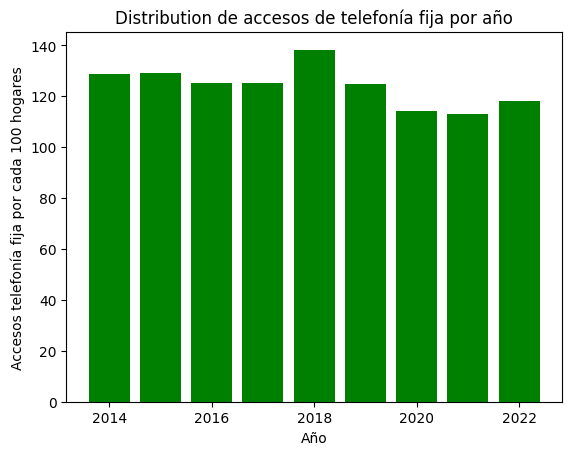

In [ ]:
plt.bar(df12['Año'], df12['Accesos telefonía fija por cada 100 hogares'],color='green')
plt.xlabel('Año')
plt.ylabel('Accesos telefonía fija por cada 100 hogares')
plt.title('Distribution de accesos de telefonía fija por año')
plt.show()

En este gráfico de cajas se puede observar la distribución de los accesos por hogares y habitantes. Se puede apreciar que el rango intercuartilico es mayor en los accesos por hogares, también la mediana y posee outliers mayores a los de los accesos por habitantes. Esto puede deberse al uso comercial de la telefonía fija.

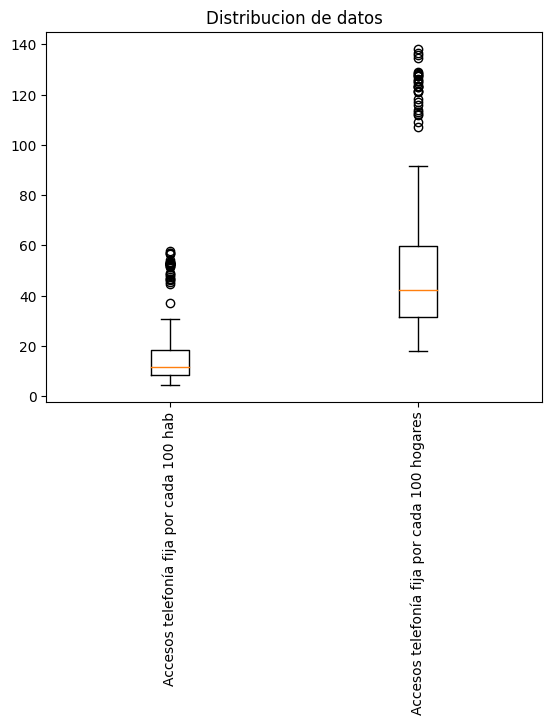

In [ ]:
plt.boxplot([df12['Accesos telefonía fija por cada 100 hab'], df12['Accesos telefonía fija por cada 100 hogares']])
plt.xticks([1, 2], ['Accesos telefonía fija por cada 100 hab', 'Accesos telefonía fija por cada 100 hogares'])
plt.title('Distribucion de datos')
plt.xticks(rotation=90)
plt.show()

##Ingresos trimestrales telefonía fija

In [ ]:
df13=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonia Fija/Ingresos_trimestrales_telefonía fija.csv')

In [ ]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Año                    33 non-null     category
 1   Trimestre              33 non-null     category
 2   Ingresos (miles de $)  33 non-null     float64 
dtypes: category(2), float64(1)
memory usage: 1.0 KB


In [ ]:
df13.head(5)

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,2916071.75
1,2014,2,2974865.20
2,2014,3,3105462.02
3,2014,4,3339690.90
4,2015,1,3260124.75


In [ ]:
df13['Año'] = df13['Año'].astype('category')
df13['Trimestre'] = df13['Trimestre'].astype('category')
df13['Ingresos (miles de $)'] = df13['Ingresos (miles de $)'].str.replace('.', '').str.replace(',', '.').astype('float64')


<ipython-input-101-c62b720fb202>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df13['Ingresos (miles de $)'] = df13['Ingresos (miles de $)'].str.replace('.', '').str.replace(',', '.').astype('float64')


En el gráfico se ve una creciento de los ingresos en pesos (ARG$). Si bien se nota un incremento, se debe tener en cuenta el índice de inflación para poder realizar un análisis más completo.

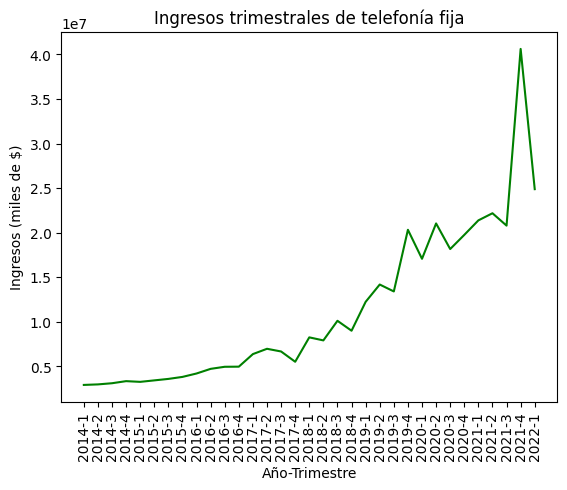

In [ ]:
df13['Año-Trimestre'] = df13['Año'].astype(str) + '-' + df13['Trimestre'].astype(str)

plt.plot(df13['Año-Trimestre'], df13['Ingresos (miles de $)'],color='green')
plt.xticks(rotation=90)
plt.xlabel('Año-Trimestre')
plt.ylabel('Ingresos (miles de $)')
plt.title('Ingresos trimestrales de telefonía fija')
plt.show()

##Ingresos trimestrales telefonía móvil

In [ ]:
df14=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonía Movil/Ingresos_trimestrales_telefonía móvil.csv')

In [ ]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    37 non-null     int64 
 1   Trimestre              37 non-null     int64 
 2   Ingresos (miles de $)  37 non-null     object
 3   Periodo                37 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [ ]:
df14['Año'] = df14['Año'].astype('category')
df14['Trimestre'] = df14['Trimestre'].astype('category')
df14['Ingresos (miles de $)'] = df14['Ingresos (miles de $)'].str.replace('$', '', regex=True).str.replace('.', '', regex=True).astype('int64')

En este gráfico se muestra una constante en el cremiento de los ingresos de telefonía móvil por trimestre. Para realizar un análisis más completo de estos ingresos se debe tener en cuenta el índice de inflación.

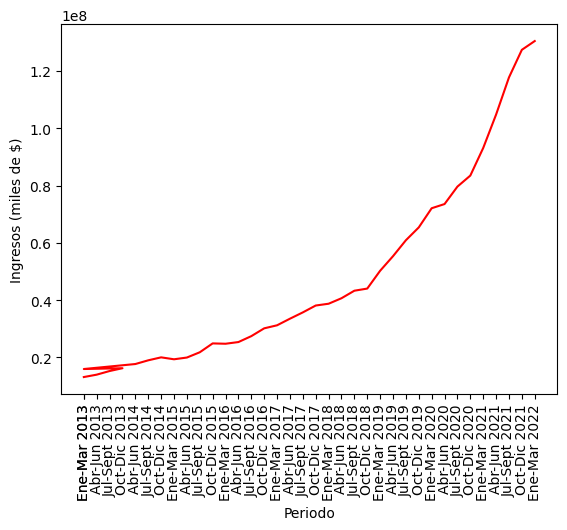

In [ ]:
plt.plot(df14['Periodo'], df14['Ingresos (miles de $)'],color='red')
plt.xticks(df14['Periodo'], rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de $)')
plt.show()

##Portabilidad altas mensuales por operador

In [ ]:
df15=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonía Movil/Portabilidad_altas_mensuales_por_operador.csv')

In [ ]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Año            120 non-null    category
 1   Mes            120 non-null    category
 2   Personal       120 non-null    int64   
 3   Claro          120 non-null    int64   
 4   Nextel         120 non-null    float64 
 5   Movistar       120 non-null    int64   
 6   Total general  120 non-null    int64   
dtypes: category(2), float64(1), int64(4)
memory usage: 5.8 KB


In [ ]:
df15['Año'] = df15['Año'].astype('category')
df15['Mes'] = df15['Mes'].astype('category')

In [ ]:
df15['Nextel'] = df15['Nextel'].fillna(0)
df15['Personal'] = df15['Personal'].str.replace(',', '', regex=True).astype('int64')
df15['Claro'] = df15['Claro'].str.replace(',', '', regex=True).astype('int64')
df15['Movistar'] = df15['Movistar'].str.replace(',', '', regex=True).astype('int64')
df15['Total general'] = df15['Total general'].str.replace(',', '', regex=True).astype('int64')

En el gráfico muestra las altas de usuarios de telefonía móvil por compañia. Se puede ver un calor dominio de Movistar,seguido por Claro, Personal y por último Nextel que dejo de estar operativo el 1 de julio de 2019, pasando a ser parte de Telecom Personal.


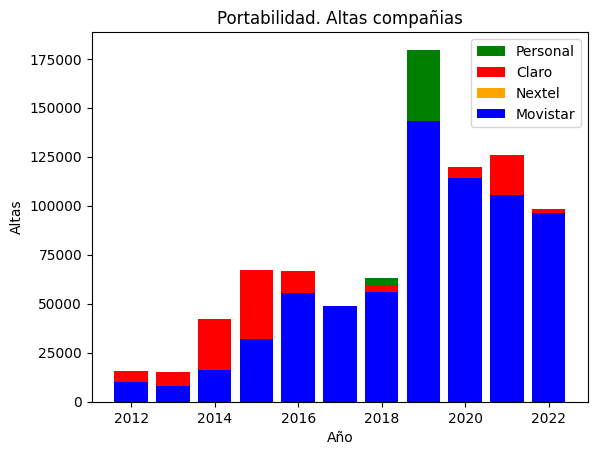

In [ ]:
colores = ['green', 'red', 'orange', 'blue']
companias = ['Personal', 'Claro', 'Nextel', 'Movistar']

for compania, color in zip(companias, colores):
    plt.bar(df15['Año'], df15[compania], color=color)

plt.xlabel('Año')
plt.ylabel('Altas')
plt.title('Portabilidad. Altas compañias')
plt.legend(companias)
plt.show()


Teniendo en cuenta los totales generales, se observa que el mayor incremento se produjo en 2019 y 2020.

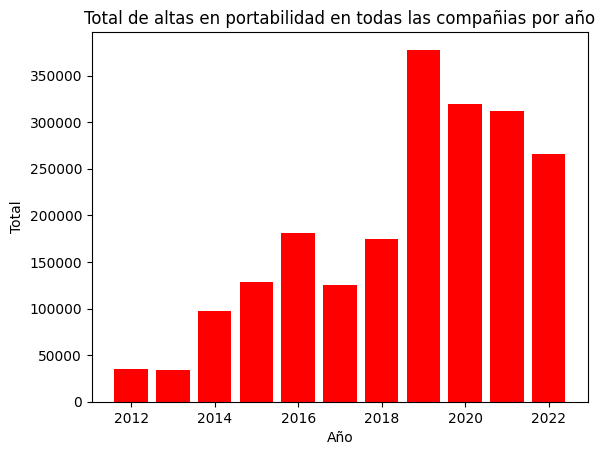

In [ ]:
plt.bar(df15['Año'], df15['Total general'],color='red')
plt.title('Total de altas en portabilidad en todas las compañias por año')
plt.xlabel('Año')
plt.ylabel('Total')

plt.show()

##Total nacional accesos telefonia movil trimestral

In [ ]:
df16=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonía Movil/Total_nacional_accesos_telefonia_movil-trimestral.csv')

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Año                          37 non-null     category
 1   Trimestre                    37 non-null     category
 2   Total de accesos pospago     37 non-null     object  
 3   Total de accesos prepago     37 non-null     object  
 4   Total de accesos operativos  37 non-null     int64   
 5   Periodo                      37 non-null     object  
dtypes: category(2), int64(1), object(3)
memory usage: 1.9+ KB


In [ ]:
df16['Año'] = df16['Año'].astype('category')
df16['Trimestre'] = df16['Trimestre'].astype('category')
df16['Total de accesos operativos'] = df16['Total de accesos operativos'].str.replace('.', '', regex=True).astype('int64')

In [ ]:
df16.iat[4, 5] = 'Ene-Mar 2014'

En el gráfico se puede observar un descenso en los accesos a la telefonía móvil, la mayor caida fue en 2020 en la pandemia donde el acceso a internet aumento

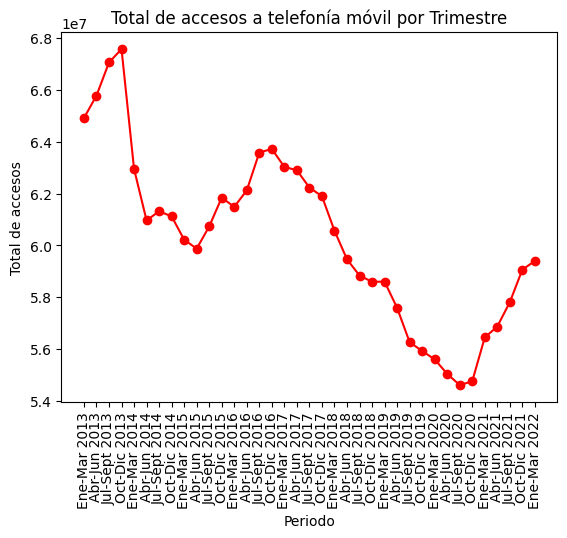

In [ ]:
plt.plot(df16['Periodo'], df16['Total de accesos operativos'], marker='o', color='red')
plt.xticks(df16['Periodo'], rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Total de accesos')
plt.title('Total de accesos a telefonía móvil por Trimestre')
plt.show()

##SMS enviados

In [ ]:
df17=pd.read_csv('/content/drive/MyDrive/PI 2/Telefonía Movil/SMS_enviados.csv')

In [ ]:
df17.head(5)

,Año,Trimestre,Número de SMS salientes,Periodo
0,2013,1,36430004057,Ene-Mar 2013
1,2013,2,34255065773,Abr-Jun 2013
2,2013,3,33217669903,Jul-Sept 2013
3,2013,4,22547130953,Oct-Dic 2013
4,2014,1,18393198881,Ene-Mar 2014


In [ ]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      37 non-null     int64 
 1   Trimestre                37 non-null     int64 
 2   Número de SMS salientes  37 non-null     object
 3   Periodo                  37 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [ ]:
df17['Año'] = df17['Año'].astype('category')
df17['Trimestre'] = df17['Trimestre'].astype('category')
df17['Número de SMS salientes'] = df17['Número de SMS salientes'].str.replace('.', '', regex=True).astype('int64')

In [ ]:
df17.iat[4, 3] = 'Ene-Mar 2014'

En este gráfico se puede ver la notable caída de los SMS enviados en los ultimos años. Esto esta relacionado con el uso del internet y redes sociales para la comunicación

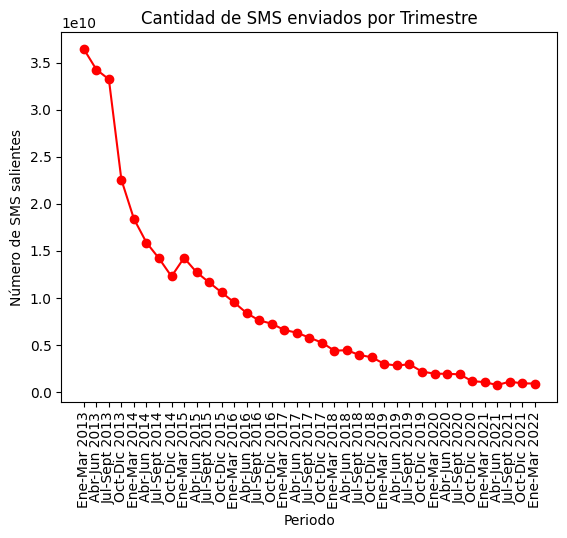

In [ ]:
plt.plot(df17['Periodo'], df17['Número de SMS salientes'], marker='o', color='red')
plt.xticks(df17['Periodo'], rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Número de SMS salientes')
plt.title('Cantidad de SMS enviados por Trimestre')
plt.show()

##Inflación de servicios

In [ ]:
df18 = pd.read_excel('/content/drive/MyDrive/PI 2/Internet/Inflación Servicios.xlsx')
df18.head(5)

,Indice de inflación de servicios,Mes-Año
0,2.4,2017-01-01
1,3.0,2017-02-01
2,2.9,2017-03-01
3,3.2,2017-04-01
4,1.5,2017-05-01


In [ ]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Indice de inflación de servicios  78 non-null     float64       
 1   Mes-Año                           78 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


El siguiente gráfico muestra la distribución del índice de inflación del periodo del 2017 al 2023.

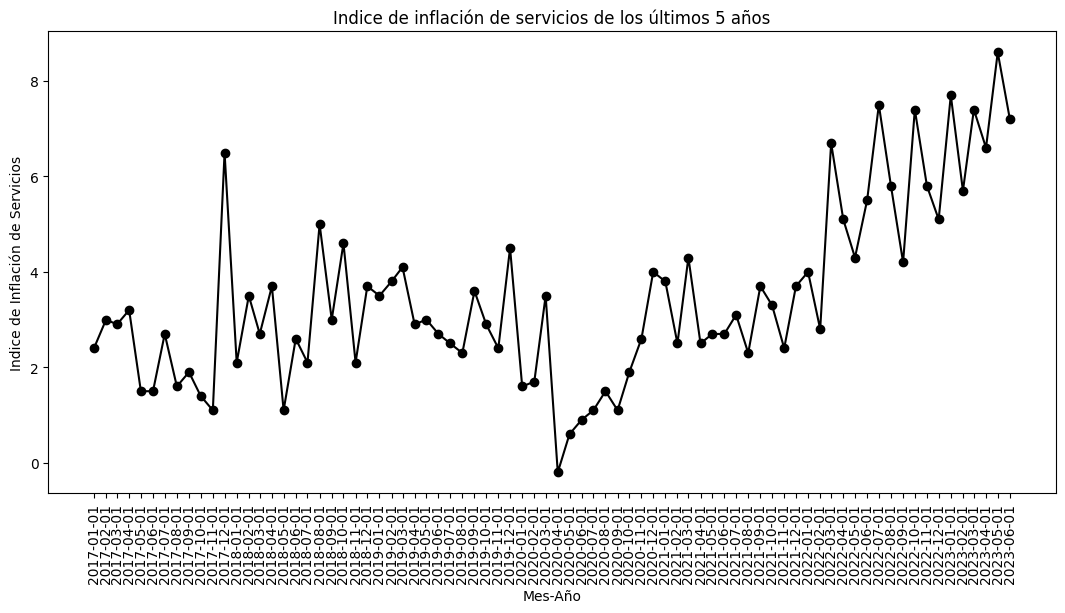

In [ ]:
plt.figure(figsize=(13, 6))
plt.plot(df18['Mes-Año'], df18['Indice de inflación de servicios'], marker='o', color='black')
plt.xticks(df18['Mes-Año'], rotation=90)
plt.xlabel('Mes-Año')
plt.ylabel('Indice de Inflación de Servicios')
plt.title('Indice de inflación de servicios de los últimos 5 años')

plt.show()

In [ ]:
df18['Año'] = pd.to_datetime(df18['Mes-Año']).dt.year

In [ ]:
df18.head(5)

,Indice de inflación de servicios,Mes-Año,Año
0,2.4,2017-01-01,2017
1,3.0,2017-02-01,2017
2,2.9,2017-03-01,2017
3,3.2,2017-04-01,2017
4,1.5,2017-05-01,2017


In [ ]:
df6.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2014,1,2984054.0,Ene-Mar 2014
1,2014,2,3270816.0,Abr-Jun 2014
2,2014,3,3478638.0,Jul-Sept 2014
3,2014,4,3950441.0,Oct-Dic 2014
4,2015,1,4876385.0,Ene-Mar 2015


In [ ]:
df_ingresos_anuales = df6.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()
df_combinado = pd.merge(df_ingresos_anuales, df18, on='Año', how='left')
df_combinado['Ingresos_Ajustados'] = df_combinado['Ingresos (miles de pesos)'] / (df_combinado['Indice de inflación de servicios'].shift() / 100 + 1)
df_combinado['Incremento_Real'] = df_combinado['Ingresos_Ajustados'].pct_change() * 100

In [ ]:
df_combinado.head(5)

,Año,Ingresos (miles de pesos),Indice de inflación de servicios,Mes-Año,Ingresos_Ajustados,Incremento_Real
0,2014,13683949.0,NaN,NaT,NaN,NaN
1,2015,20108814.0,NaN,NaT,NaN,NaN
2,2016,26867508.0,NaN,NaT,NaN,NaN
3,2017,39671973.0,2.4,2017-01-01,NaN,NaN
4,2017,39671973.0,3.0,2017-02-01,3.874216e+07,NaN


In [ ]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Año                               75 non-null     int64         
 1   Ingresos (miles de pesos)         75 non-null     float64       
 2   Indice de inflación de servicios  72 non-null     float64       
 3   Mes-Año                           72 non-null     datetime64[ns]
 4   Ingresos_Ajustados                71 non-null     float64       
 5   Incremento_Real                   70 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.1 KB


In [ ]:
df_combinado2 = df_combinado.dropna()

In [ ]:
df_combinado2.head(5)

,Año,Ingresos (miles de pesos),Indice de inflación de servicios,Mes-Año,Ingresos_Ajustados,Incremento_Real
5,2017,39671973.0,2.9,2017-03-01,3.851648e+07,-0.582524
6,2017,39671973.0,3.2,2017-04-01,3.855391e+07,0.097182
7,2017,39671973.0,1.5,2017-05-01,3.844183e+07,-0.290698
8,2017,39671973.0,1.5,2017-06-01,3.908569e+07,1.674877
9,2017,39671973.0,2.7,2017-07-01,3.908569e+07,0.000000


In [ ]:
print(df_combinado2)

     Año  Ingresos (miles de pesos)  Indice de inflación de servicios  \
5   2017                 39671973.0                               2.9   
6   2017                 39671973.0                               3.2   
7   2017                 39671973.0                               1.5   
8   2017                 39671973.0                               1.5   
9   2017                 39671973.0                               2.7   
..   ...                        ...                               ...   
70  2022                 51432896.0                               5.8   
71  2022                 51432896.0                               4.2   
72  2022                 51432896.0                               7.4   
73  2022                 51432896.0                               5.8   
74  2022                 51432896.0                               5.1   

      Mes-Año  Ingresos_Ajustados  Incremento_Real  
5  2017-03-01        3.851648e+07        -0.582524  
6  2017-04-01    

In [ ]:
df_combinado2.to_csv('/content/drive/MyDrive/PI 2/Internet/df_combinado2.csv', index=False)

Acá se muestra el porcentaje del incremento real de los ingresos de Internet fijo por año. Este apenas superó el 4% en el año 2018 y se produjeron mayores pérdidas hacia el año 2022.

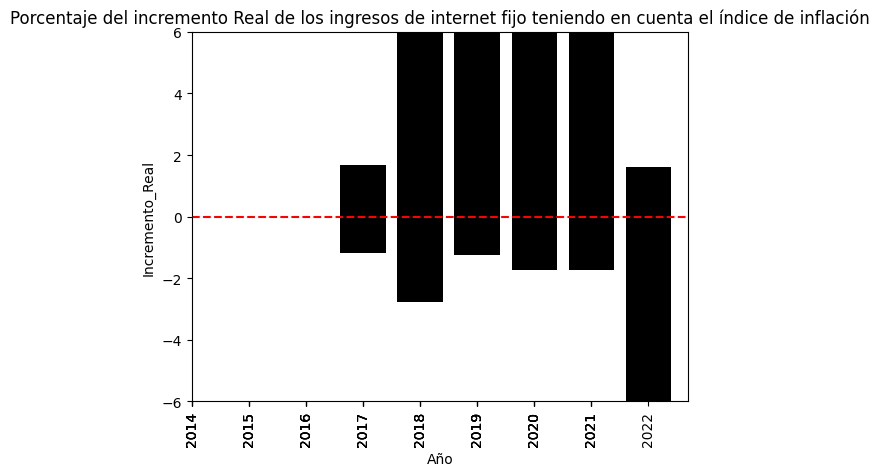

In [ ]:
plt.bar(df_combinado2['Año'], df_combinado2['Incremento_Real'], color='black')
plt.axhline(0, color='red', linestyle='--')

plt.xticks(df['Año'], rotation=90)
plt.xlabel('Año')
plt.ylabel('Incremento_Real')
plt.title('Porcentaje del incremento Real de los ingresos de internet fijo teniendo en cuenta el índice de inflación')
plt.ylim(bottom=-6, top=6)
plt.show()